In [34]:
import numpy
import nltk
import sklearn
!pip install ipdb
import ipdb
!pip install tensorboardX
import tensorboardX
import pytorch as torch

In [35]:
# Clone GitHub repository to enable downloading GLUE data
!git clone https://github.com/nyu-mll/GLUE-baselines
!git clone https://github.com/wasiahmad/paraphrase_identification.git

fatal: destination path 'GLUE-baselines' already exists and is not an empty directory.
fatal: destination path 'paraphrase_identification' already exists and is not an empty directory.


In [36]:
# Download GLUE data
!python GLUE-baselines/download_glue_data.py --data_dir="C:/Users/annko/Documents/Masterthesis/Masterthesis" --tasks all --path_to_mrpc=paraphrase_identification/dataset/msr-paraphrase-corpus

	Completed!
	Completed!
Processing MRPC...
	Completed!
	Completed!
	Completed!
	Completed!
	Completed!
	Completed!
	Completed!
	Completed!
	Completed!


In [37]:
# function for descriptive analysis of GLUE data
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from collections import defaultdict
import math

In [38]:
# define data direction to read data
data_dir = "C:/Users/annko/Documents/Masterthesis/Masterthesis/"

# read respective GLUE tasks

# WNLI
wnli_train = pd.read_csv("{}/WNLI/train.tsv".format(data_dir), delimiter='\\t')
wnli_dev = pd.read_csv("{}/WNLI/dev.tsv".format(data_dir), delimiter='\\t')

# RTE
rte_train = pd.read_csv("{}/RTE/train.tsv".format(data_dir), delimiter='\\t')
rte_dev = pd.read_csv("{}/RTE/dev.tsv".format(data_dir), delimiter='\\t')

# MRPC
mrpc_train = pd.read_csv("{}/MRPC/train.tsv".format(data_dir), delimiter='\\t', header=None, skiprows=1, 
                    names=['Quality', 'ID1', 'ID2', 'String2', 'String'])
mrpc_dev = pd.read_csv("{}/MRPC/dev.tsv".format(data_dir), delimiter='\\t', header=None, skiprows=1, 
                  names=['Quality', 'ID1', 'ID2', 'String2', 'String'])

# STS-B
stsb_train = pd.read_csv("{}/STS-B/train.tsv".format(data_dir), delimiter='\\t')
stsb_dev = pd.read_csv("{}/STS-B/dev.tsv".format(data_dir), delimiter='\\t')

# CoLA
cola_train = pd.read_csv("{}/CoLA/train.tsv".format(data_dir), delimiter='\t', header=None, skiprows=1, 
                    names=['sentence_source', 'label', 'label_notes', 'sentence'])
cola_dev = pd.read_csv("{}/CoLA/dev.tsv".format(data_dir), delimiter='\t', header=None, skiprows=1, 
                  names=['sentence_source', 'label', 'label_notes', 'sentence'])

# SST-2
sst2_train = pd.read_csv("{}/SST-2/train.tsv".format(data_dir), delimiter='\t')
sst2_dev = pd.read_csv("{}/SST-2/dev.tsv".format(data_dir), delimiter='\t')

# QQP
qqp_train = pd.read_csv("{}/QQP/train.tsv".format(data_dir), delimiter='\\t', quotechar='"')
qqp_dev = pd.read_csv("{}/QQP/dev.tsv".format(data_dir), delimiter='\\t', quotechar='"')

# QNLI
qnli_train = pd.read_csv("{}/QNLI/train.tsv".format(data_dir), delimiter='\\t')
qnli_dev = pd.read_csv("{}/QNLI/dev.tsv".format(data_dir), delimiter='\\t')

# MNLI
mnli_train = pd.read_csv("{}/MNLI/train.tsv".format(data_dir), delimiter='\\t')
mnli_dev_m = pd.read_csv("{}/MNLI/dev_matched.tsv".format(data_dir), delimiter='\\t')
mnli_dev_mism = pd.read_csv("{}/MNLI/dev_mismatched.tsv".format(data_dir), delimiter='\\t')

<ipython-input-38-1d609790f022>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  wnli_train = pd.read_csv("{}/WNLI/train.tsv".format(data_dir), delimiter='\\t')
<ipython-input-38-1d609790f022>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  wnli_dev = pd.read_csv("{}/WNLI/dev.tsv".format(data_dir), delimiter='\\t')
<ipython-input-38-1d609790f022>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rte_train = pd.

In [39]:
# have a look at data samples
datalist = [wnli_train, rte_train, mrpc_train, stsb_train, cola_train, sst2_train, qqp_train, qnli_train, mnli_train]
data_names = ['WNLI', 'RTE', 'MRPC', 'CoLA', 'STS-B', 'SST-2', 'QQP', 'QNLI', 'MNLI']

pd.set_option('display.max_colwidth', -1) # to enable viewing whole sentences

counter = 0
for data in datalist:
    print(data_names[counter])
    print(data.sample(3))
    print('\n')
    counter += 1

WNLI
     index  \
498  498     
237  237     
128  128     

                                                                                         sentence1  \
498  Billy cried because Toby wouldn't share his toy.                                                
237  Mama came over and sat down beside Alice. Gently she stroked her hair and let the child weep.   
128  I put the cake away in the refrigerator. It has a lot of leftovers in it.                       

                                                sentence2  label  
498  Billy cried because Toby wouldn't share Billy's toy.  0      
237  Alice stroked her hair and let the child weep.        0      
128  The cake has a lot of leftovers in it.                0      


RTE
      index  \
1466  1466    
947   947     
1249  1249    

                                                                                                                                                                                                  

<ipython-input-39-17cba3990110>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # to enable viewing whole sentences


In [40]:
# regard info of respective GLUE tasks
counter = 0
for data in datalist:
    print(data_names[counter])
    print(data.info())
    print('\n')
    counter += 1
    
# WNLI, MRPC, STS-B, SST-2, CoLA, QQP and QNLI contain numeric labels; RTE and MNLI contains labels with categoric values

WNLI
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      635 non-null    int64 
 1   sentence1  635 non-null    object
 2   sentence2  635 non-null    object
 3   label      635 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.0+ KB
None


RTE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      2490 non-null   int64 
 1   sentence1  2490 non-null   object
 2   sentence2  2490 non-null   object
 3   label      2490 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.9+ KB
None


MRPC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Quality

In [41]:
# distingish respective label names
counter = 0
for i in datalist:
    print(data_names[counter])
    print(i.columns)
    print('\n')
    counter += 1

WNLI
Index(['index', 'sentence1', 'sentence2', 'label'], dtype='object')


RTE
Index(['index', 'sentence1', 'sentence2', 'label'], dtype='object')


MRPC
Index(['Quality', 'ID1', 'ID2', 'String2', 'String'], dtype='object')


CoLA
Index(['index', 'genre', 'filename', 'year', 'old_index', 'source1', 'source2',
       'sentence1', 'sentence2', 'score'],
      dtype='object')


STS-B
Index(['sentence_source', 'label', 'label_notes', 'sentence'], dtype='object')


SST-2
Index(['sentence', 'label'], dtype='object')


QQP
Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')


QNLI
Index(['index', 'question', 'sentence', 'label'], dtype='object')


MNLI
Index(['index', 'promptID', 'pairID', 'genre', 'sentence1_binary_parse',
       'sentence2_binary_parse', 'sentence1_parse', 'sentence2_parse',
       'sentence1', 'sentence2', 'label1', 'gold_label'],
      dtype='object')




In [42]:
def label_counts_cat(data, data_label, dataname):
    print('{}'.format(dataname))
    print('Number of sentences: {:,}'.format(data.shape[0]))
    print(data_label.value_counts(normalize=True))
    print('\n')

In [43]:
# print number of sentences and value counts of respective labels
label_list = [wnli_train.label, rte_train.label, mrpc_train.Quality, stsb_train.score, cola_train.label, sst2_train.label, 
             qqp_train.is_duplicate, qnli_train.label, mnli_train.gold_label]

counter = 0
for i in datalist:
    label_counts_cat(i, label_list[counter], data_names[counter])
    counter += 1

WNLI
Number of sentences: 635
0    0.508661
1    0.491339
Name: label, dtype: float64


RTE
Number of sentences: 2,490
entailment        0.501606
not_entailment    0.498394
Name: label, dtype: float64


MRPC
Number of sentences: 3,668
1    0.674482
0    0.325518
Name: Quality, dtype: float64


CoLA
Number of sentences: 5,749
0.000000    0.063837
4.000000    0.061576
3.000000    0.054792
3.800000    0.046443
5.000000    0.046269
              ...   
2.830000    0.000174
1.778000    0.000174
0.944000    0.000174
4.571000    0.000174
3.333333    0.000174
Name: score, Length: 140, dtype: float64


STS-B
Number of sentences: 8,550
1    0.704327
0    0.295673
Name: label, dtype: float64


SST-2
Number of sentences: 67,349
1    0.557826
0    0.442174
Name: label, dtype: float64


QQP
Number of sentences: 363,870
0.0    0.630676
1.0    0.369324
Name: is_duplicate, dtype: float64


QNLI
Number of sentences: 108,436
entailment        0.5
not_entailment    0.5
Name: label, dtype: float64


MNLI
N

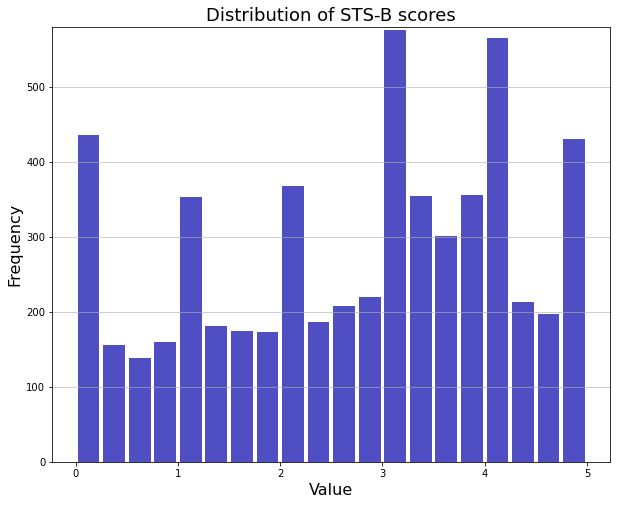

In [44]:
### Histogram for STS-B

plt.figure(figsize = (10, 8))
n, bins, patches = plt.hist(x=stsb_train.score, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of STS-B scores', fontsize = 18)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=16)

plt.savefig('stsb-hist.png')

In [45]:
# print number of examples for development sets
dev_list = [wnli_dev, rte_dev, mrpc_dev, stsb_dev, cola_dev, sst2_dev, qqp_dev, qnli_dev, mnli_dev_m, mnli_dev_mism]
dev_names = ['WNLI', 'RTE', 'MRPC', 'CoLA', 'STS-B', 'SST-2', 'QQP', 'QNLI', 'MNLI_matched', 'MNLI_mismatched']

counter = 0
for dev in dev_list:
    print('{}'.format(dev_names[counter]))
    print('Number of sentences: {:,}'.format(dev.shape[0]))
    print('\n')
    counter += 1

WNLI
Number of sentences: 71


RTE
Number of sentences: 277


MRPC
Number of sentences: 408


CoLA
Number of sentences: 1,500


STS-B
Number of sentences: 1,042


SST-2
Number of sentences: 872


QQP
Number of sentences: 40,431


QNLI
Number of sentences: 5,732


MNLI_matched
Number of sentences: 9,815


MNLI_mismatched
Number of sentences: 9,832


